# HACKATON_4!!!!! <3 <3 <3 <3 <3

imported libraries

In [7]:
import cv2 as cv
from roboflow import Roboflow
from ultralytics import YOLO
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json

helper function

In [2]:
def show_image(image,descrption=None):
  if descrption:
    print(descrption)
  plt.axis('off')
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

# IMAGE PREPROCESSING

1. **training YOLO model:** For generating an automated way of cropping floor plans from an image file automatically, a YOLO model was trained using a dataset of images an labels.  
For the purpose of doing a quick test, only 10 epochs were conducted. Please feel free to apply more epochs to drastically improve accuracy.

In [ ]:
# loading the dataset for training the YOLO model (PLEASE CHANGE THE API KEY)

rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("alankras").project("test-qu1po")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-3 in yolov8:: 100%|██████████| 1844/1844 [00:00<00:00, 1855.62it/s]


In [14]:
# training the YOLO model (nano version)

model = YOLO('yolov8n.yaml')
model.train(data = 'conf.yaml', epochs = 10)

Ultralytics 8.3.86 🚀 Python-3.13.1 torch-2.6.0 CPU (Apple M2 Max)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=conf.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format

train: Scanning /Users/annasurina/Downloads/hackaton_4/test-3/train/labels.cache... 640 images, 3 backgrounds, 0 corrupt: 100%|██████████| 640/640 [00:00<?, ?it/s]
val: Scanning /Users/annasurina/Downloads/hackaton_4/test-3/valid/labels.cache... 182 images, 0 backgrounds, 0 corrupt: 100%|██████████| 182/182 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.505      3.586      4.179         16        640: 100%|██████████| 40/40 [03:09<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.72s/it]

                   all        182        184    0.00308      0.913     0.0839      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.366       3.33      3.853         16        640: 100%|██████████| 40/40 [03:12<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.70s/it]

                   all        182        184    0.00344      0.967      0.442      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.194      3.185      3.545         17        640: 100%|██████████| 40/40 [03:14<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.69s/it]

                   all        182        184     0.0397       0.88      0.221      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/10         0G       2.05      3.013      3.237         16        640: 100%|██████████| 40/40 [03:15<00:00,  4.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.70s/it]

                   all        182        184      0.117      0.212     0.0681     0.0196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/10         0G      2.024      2.775      3.149         17        640: 100%|██████████| 40/40 [03:14<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.68s/it]

                   all        182        184     0.0406      0.125     0.0126    0.00268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/10         0G       1.99      2.539       3.08         16        640: 100%|██████████| 40/40 [03:15<00:00,  4.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.69s/it]

                   all        182        184       0.34      0.739       0.45      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/10         0G      2.006      2.205      2.988         16        640: 100%|██████████| 40/40 [03:12<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.66s/it]

                   all        182        184      0.697      0.707      0.676      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/10         0G      1.949      2.036      2.915         16        640: 100%|██████████| 40/40 [03:12<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.63s/it]

                   all        182        184       0.67      0.614      0.661      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/10         0G      1.836      1.716      2.779         16        640: 100%|██████████| 40/40 [03:12<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.61s/it]

                   all        182        184      0.804      0.756      0.783      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/10         0G      1.821      1.604      2.749         16        640: 100%|██████████| 40/40 [03:11<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.61s/it]

                   all        182        184      0.826      0.788      0.791      0.449

10 epochs completed in 0.615 hours.


Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.13.1 torch-2.6.0 CPU (Apple M2 Max)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.55s/it]


                   all        182        184      0.826      0.788      0.791      0.449
Speed: 0.7ms preprocess, 145.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x3142794f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

**2. uploading target image:** 

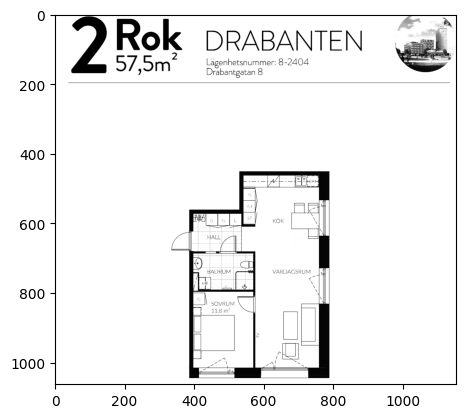

In [28]:
img = cv.imread("plan_hehehe.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

In [ ]:
# Testing the YOLO model

model = YOLO('runs/detect/train3/weights/best.pt')
results = model('plan_hehehe.png')
results[0].show()


image 1/1 /Users/annasurina/Downloads/hackaton_4/plan_hehehe.png: 608x640 (no detections), 36.3ms
Speed: 2.6ms preprocess, 36.3ms inference, 0.2ms postprocess per image at shape (1, 3, 608, 640)


AttributeError: 'Results' object has no attribute 'dtype'. See valid attributes below.

A class for storing and manipulating inference results.

This class encapsulates the functionality for handling detection, segmentation, pose estimation,
and classification results from YOLO models.

Attributes:
    orig_img (numpy.ndarray): Original image as a numpy array.
    orig_shape (Tuple[int, int]): Original image shape in (height, width) format.
    boxes (Boxes | None): Object containing detection bounding boxes.
    masks (Masks | None): Object containing detection masks.
    probs (Probs | None): Object containing class probabilities for classification tasks.
    keypoints (Keypoints | None): Object containing detected keypoints for each object.
    obb (OBB | None): Object containing oriented bounding boxes.
    speed (Dict[str, float | None]): Dictionary of preprocess, inference, and postprocess speeds.
    names (Dict[int, str]): Dictionary mapping class IDs to class names.
    path (str): Path to the image file.
    _keys (Tuple[str, ...]): Tuple of attribute names for internal use.

Methods:
    update: Updates object attributes with new detection results.
    cpu: Returns a copy of the Results object with all tensors on CPU memory.
    numpy: Returns a copy of the Results object with all tensors as numpy arrays.
    cuda: Returns a copy of the Results object with all tensors on GPU memory.
    to: Returns a copy of the Results object with tensors on a specified device and dtype.
    new: Returns a new Results object with the same image, path, and names.
    plot: Plots detection results on an input image, returning an annotated image.
    show: Shows annotated results on screen.
    save: Saves annotated results to file.
    verbose: Returns a log string for each task, detailing detections and classifications.
    save_txt: Saves detection results to a text file.
    save_crop: Saves cropped detection images.
    tojson: Converts detection results to JSON format.

Examples:
    >>> results = model("path/to/image.jpg")
    >>> for result in results:
    ...     print(result.boxes)  # Print detection boxes
    ...     result.show()  # Display the annotated image
    ...     result.save(filename="result.jpg")  # Save annotated image


In [30]:
width, height = img_gray.shape

print(f"the width of the image is {width} and the height is {height}")

the width of the image is 1063 and the height is 1153


Due to time constraints and lack of hardware power, the YOLO model could not be trained approiatelly. Therefore, the following script was used to manually do the crop. the cropping procedure functions by reading pixels as tabular data (rows and columns).

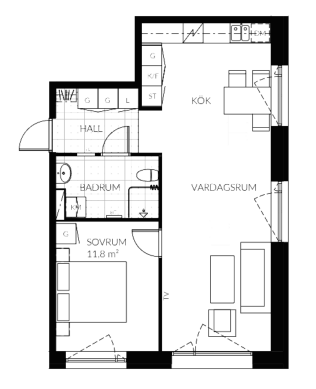

In [31]:
img = img[440:height,320:820]
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(img, cmap="gray")


# USING CV2

1. APPLYING THRESHOLD TO GET WALLS

Thresholded image


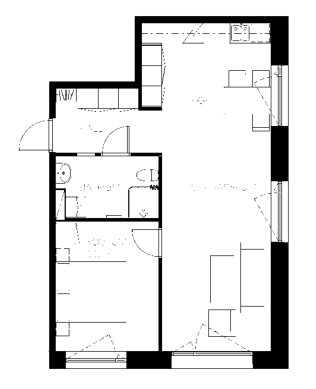

In [32]:
_, thresh = cv.threshold(img_gray, 40, 255, cv.THRESH_BINARY)

show_image(thresh, "Thresholded image")

2. REMOVING UNNECESARY "NOISE" USING MORPHOLOGYCAL OPERATIONS

cleaned binary image


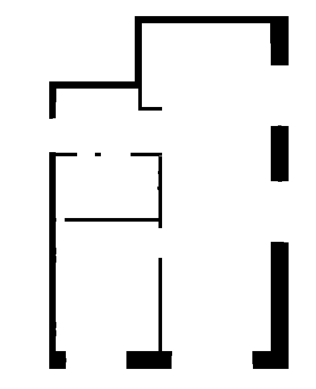

In [33]:
kernel = np.ones((3,3), np.uint8)
close_morph_thresh = cv.morphologyEx(thresh,cv.MORPH_CLOSE, kernel, iterations=2)

show_image(close_morph_thresh, "cleaned binary image")

2. getting contours

Image with contours


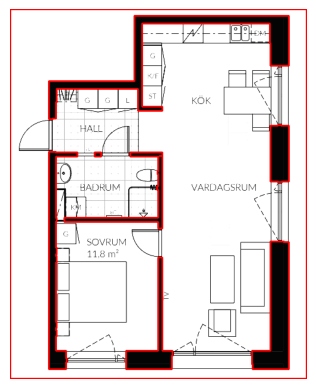

Image with enumerated corners


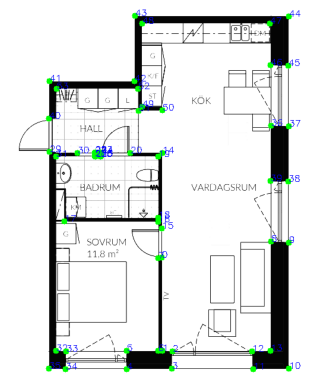

In [34]:
contours, hierarchy = cv.findContours(close_morph_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

image_contours = img.copy()
image_corners = img.copy()
corners = []
corners_coordinates = []

corner_index = 0

for i, contour in enumerate(contours):
  if i == 0:
    continue
  epsilon = 0.01*cv.arcLength(contour, True)
  approx = cv.approxPolyDP(contour, epsilon, True)
  corners.append(approx)
  cv.drawContours(image_contours, contours, -1, (0,0,255), 2)

for corner in corners:
    for point in corner:
        cv.circle(image_corners, tuple(point[0]), 5, (0, 255, 0), -1)
        cv.putText(image_corners, str(corner_index), tuple(point[0]), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        
        x, y = point[0]
        corners_coordinates.append({f"corner {int(corner_index)}":{"x": int(x), "y": int(y)}})
        corner_index += 1

corners_json = json.dumps(corners_coordinates, indent=4)

show_image(image_contours, "Image with contours")
show_image(image_corners, "Image with enumerated corners")

here you can get the coordinates of every point and their respective label

In [35]:
print(corners_json)

[
    {
        "corner 0": {
            "x": 255,
            "y": 418
        }
    },
    {
        "corner 1": {
            "x": 256,
            "y": 575
        }
    },
    {
        "corner 2": {
            "x": 273,
            "y": 576
        }
    },
    {
        "corner 3": {
            "x": 272,
            "y": 605
        }
    },
    {
        "corner 4": {
            "x": 196,
            "y": 606
        }
    },
    {
        "corner 5": {
            "x": 196,
            "y": 575
        }
    },
    {
        "corner 6": {
            "x": 249,
            "y": 575
        }
    },
    {
        "corner 7": {
            "x": 249,
            "y": 419
        }
    },
    {
        "corner 8": {
            "x": 439,
            "y": 391
        }
    },
    {
        "corner 9": {
            "x": 469,
            "y": 393
        }
    },
    {
        "corner 10": {
            "x": 469,
            "y": 605
        }
    },
    {
        "corner 11": {


# USING ROBOFLOW

To detect features such as door a roboflow model was used. This model is capable od recognizing many features of a plan with varying levels of confidence. The features that tend to be recognized with the most confidence are the doors.

**AGAIN! don't forget to use your won api key to use this model.**

In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="YOUR_API_KEY"
)

result = CLIENT.infer(image_contours, model_id="door-object-detection/1")

ModuleNotFoundError: No module named 'inference_sdk'

In [124]:
for object in result["predictions"]:
  print(object)

{'x': 231.5, 'y': 394.5, 'width': 59.0, 'height': 51.0, 'confidence': 0.8581385612487793, 'class': 'Door', 'class_id': 0, 'detection_id': 'e84d765d-5fe5-4b91-9bd7-54301b36b218'}
{'x': 178.5, 'y': 225.0, 'width': 51.0, 'height': 60.0, 'confidence': 0.8541085124015808, 'class': 'Door', 'class_id': 0, 'detection_id': '12f2fb44-3dbe-4182-b485-8bc3e39a0da4'}
{'x': 44.5, 'y': 213.0, 'width': 65.0, 'height': 58.0, 'confidence': 0.8474642038345337, 'class': 'Door', 'class_id': 0, 'detection_id': 'a3fbd832-136a-4e67-aafd-7280ac2137d6'}


In [125]:
mask = np.zeros(img.shape[:2], dtype=np.uint8)

for prediction in result['predictions']:
    x, y, w, h = int(prediction['x']), int(prediction['y']), int(prediction['width']), int(prediction['height'])
    detected_region = img[y - h//2 : y + h//2, x - w//2 : x + w//2].copy()
    gray_region = cv.cvtColor(detected_region, cv.COLOR_BGR2GRAY)
    _, region_mask = cv.threshold(gray_region, 200, 255, cv.THRESH_BINARY_INV)
    contours, _ = cv.findContours(region_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        cnt[:, 0, 0] += x - w//2
        cnt[:, 0, 1] += y - h//2  
        cv.drawContours(mask, [cnt], -1, (255), thickness=cv.FILLED)

extracted_layer = cv.bitwise_and(img, img, mask=mask)

b, g, r = cv.split(extracted_layer)
alpha = mask
extracted_layer_rgba = cv.merge((b, g, r, alpha))


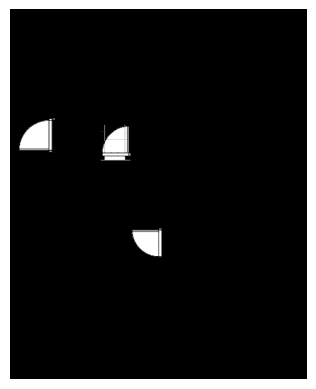

In [ ]:
show_image(extracted_layer_rgba, "Shows only the doors in the mask")

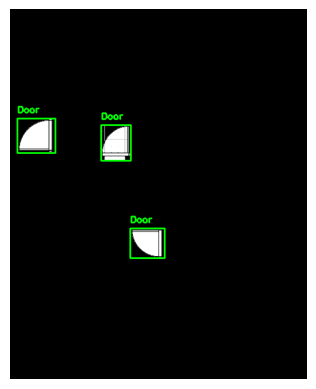

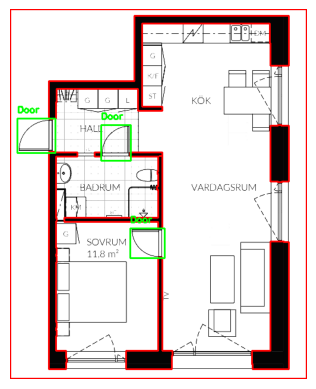

In [ ]:
contours_copy = image_contours.copy()

for prediction in result['predictions']:
    x, y, w, h = int(prediction['x']), int(prediction['y']), int(prediction['width']), int(prediction['height'])
    class_name = prediction['class']

    # Draw rectangle on the extracted_layer_rgba
    cv.rectangle(extracted_layer_rgba, (x - w//2, y - h//2), (x + w//2, y + h//2), (0, 255, 0, 255), 2)
    cv.putText(extracted_layer_rgba, class_name, (x - w//2, y - h//2 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0, 255), 2)

    # Draw rectangle on the original image
    cv.rectangle(contours_copy, (x - w//2, y - h//2), (x + w//2, y + h//2), (0, 255, 0), 2)
    cv.putText(contours_copy, class_name, (x - w//2, y - h//2 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

show_image(extracted_layer_rgba, "Extracted layer with bounding boxes")
show_image(contours_copy, "contours image with bounding boxes")

Here you can get a JSON file with the coordinates of the objects and the class.

In [ ]:
result['predictions']

NameError: name 'result' is not defined